## Use the S1.txt data file and plot the datapoints. Split the dataset into train and test set. Implement KNN algorithm on your own and classify the datapoints and then use sklearn's KNN to compare. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import mode
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
# Loop the data lines
with open("S1.txt", 'r') as temp_f:
    # get No of columns in each line
    col_count = [ len(l.split(" ")) for l in temp_f.readlines() ]

    # Generate column names  (names will be 0, 1, 2, ..., maximum columns - 1)
column_names = [i for i in range(0, max(col_count))]

# Read csv
df = pd.read_csv("S1.txt", header=None, delimiter=" ", names=column_names)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       0 non-null      float64
 1   1       0 non-null      float64
 2   2       0 non-null      float64
 3   3       0 non-null      float64
 4   4       4955 non-null   float64
 5   5       45 non-null     float64
 6   6       0 non-null      float64
 7   7       0 non-null      float64
 8   8       4927 non-null   float64
 9   9       73 non-null     float64
dtypes: float64(10)
memory usage: 390.8 KB


In [4]:
# we see missing values and it seems column 5 and 9 contains the missing datas of column 4 and 8

df.isnull().sum()

0    5000
1    5000
2    5000
3    5000
4      45
5    4955
6    5000
7    5000
8      73
9    4927
dtype: int64

In [5]:
# we fill the values of 4 and 8 from 5 and 9

df[4] = df[4].fillna(df[5])
df[8] = df[8].fillna(df[9])

In [6]:
# drop the NAN columns
df = df.dropna(axis=1)

In [7]:
labels = pd.read_csv("S1-labels.pa")
labels.head(5)

,VQ PARTITIONING 2.0
0,15
1,5000
2,DataGen
3,-------------------------------------
4,1


In [8]:
# drop first four rows
labels = labels.drop([0,1,2,3])
labels = labels.reset_index().drop('index',axis=1)

In [9]:
# preparing dataframe for model prediction
data = pd.concat([df,labels],axis=1)
data = data.rename(columns={4: "x", 8: "y","VQ PARTITIONING 2.0":"class"})

<AxesSubplot:xlabel='x', ylabel='y'>

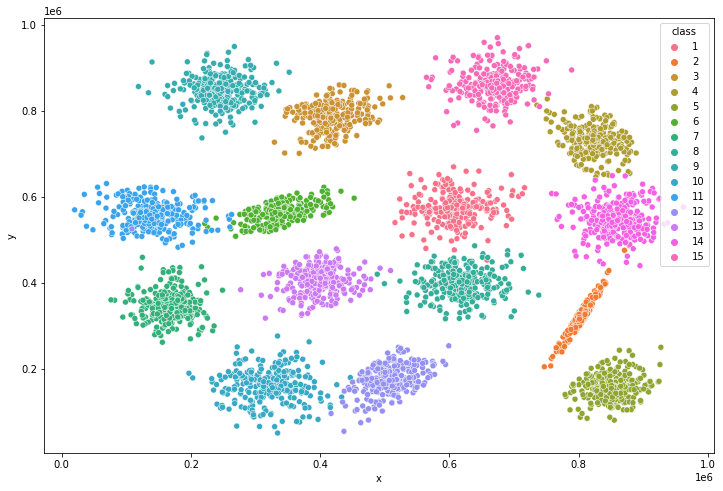

In [10]:
# visualizing through scatter polt
plt.figure(figsize=(12,8))
sns.scatterplot(x='x',y='y',hue='class',data=data)

In [11]:
data['class'] = data['class'].astype(int) # converting object to int
X = data.iloc[:,:-1].values
y = data.iloc[:,-1:].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [12]:
# Own K Nearest Neighbors Classification
  
class K_Nearest_Neighbors_Classifier() :       
    def __init__( self, K ) :          
        self.K = K
        
    # Function to store training set
    def fit( self, X_train, Y_train ) :  
        self.X_train = X_train
        self.Y_train = Y_train
          
        # no_of_training_examples, no_of_features
        self.m, self.n = X_train.shape
      
    # Function for prediction
    def predict( self, X_test ) :
        self.X_test = X_test
        
        # no_of_test_examples, no_of_features  
        self.m_test, self.n = X_test.shape
        
        # initialize Y_predict  
        Y_predict = np.zeros( self.m_test )
          
        for i in range( self.m_test ) :
            x = self.X_test[i]
              
            # find the K nearest neighbors from current test example   
            neighbors = np.zeros( self.K )
            neighbors = self.find_neighbors( x )
              
            # most frequent class in K neighbors
            Y_predict[i] = mode( neighbors )[0][0]    
        return Y_predict
      
    # Function to find the K nearest neighbors to current test example
    def find_neighbors( self, x ) :
          
        # calculate all the euclidean distances between current 
        # test example x and training set X_train
        euclidean_distances = np.zeros( self.m )
        for i in range( self.m ) :
            d = self.euclidean( x, self.X_train[i] )
            euclidean_distances[i] = d
          
        # sort Y_train according to euclidean_distance_array and 
        # store into Y_train_sorted
        inds = euclidean_distances.argsort()
        Y_train_sorted = self.Y_train[inds]
        return Y_train_sorted[:self.K]
      
    # Function to calculate euclidean distance
    def euclidean( self, x, x_train ) :
        return np.sqrt( np.sum( np.square( x - x_train ) ) )

In [13]:
# own model
model = K_Nearest_Neighbors_Classifier(K = 3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 

In [14]:
# sklearn model
model1 = KNeighborsClassifier(n_neighbors = 3)
model1.fit(X_train, y_train.ravel())
y_pred1 = model1.predict(X_test)

In [15]:
print(f"Own model score: {(accuracy_score(y_test,y_pred))*100} ")
print(f"Sklearn model score: {(accuracy_score(y_test,y_pred1))*100} ")

Own model score: 99.0 
Sklearn model score: 99.0 


Both the models performed well with same accuracy

## Use S2.txt data file and plot the datapoints. Figure out the optimal clusters that can be formed and make clusters. Plot the datapoints and centroid.(Use both your own implementation and Sklearn's).

In [16]:
# Loop the data lines
with open("S2.txt", 'r') as temp_f:
    # get No of columns in each line
    col_count = [ len(l.split(" ")) for l in temp_f.readlines() ]

    # Generate column names  (names will be 0, 1, 2, ..., maximum columns - 1)
column_names = [i for i in range(0, max(col_count))]

# Read csv
S2 = pd.read_csv("S2.txt", header=None, delimiter=" ", names=column_names)

In [17]:
S2.isnull().sum()

0     5000
1     5000
2     5000
3     5000
4        1
5     4999
6     5000
7     5000
8        8
9     4993
10    4999
dtype: int64

In [18]:
S2[4] = S2[4].fillna(S2[5])
S2[8] = S2[8].fillna(S2[9])
S2[8] = S2[8].fillna(S2[10])
S2 = S2.dropna(axis=1)
S2 = S2.rename(columns={4: "x", 8: "y"} )

In [19]:
S2

,x,y
0,624474.0,837604.0
1,673412.0,735362.0
2,647442.0,677000.0
3,532283.0,741384.0
4,646529.0,742844.0
...,...,...
4995,540118.0,671072.0
4996,507453.0,777031.0
4997,569266.0,738385.0
4998,444587.0,878830.0


<AxesSubplot:xlabel='x', ylabel='y'>

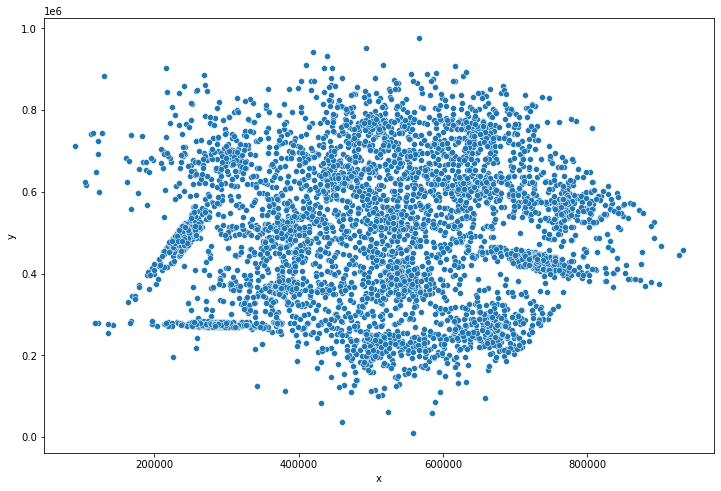

In [20]:
# visualizing through scatter polt
plt.figure(figsize=(12,8))
sns.scatterplot(x='x',y='y',data=S2)

From the above scatter plot we cannot tell the clusters. Another method for finding optimal clusters is through elbow curve method.

In [21]:
# we initialise kmeans and use the inertia attribute to identify 
# the sum of squared distances of samples to the nearest cluster centre.

Sum_of_squared_distances = []
K = range(1,35)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(S2)
    Sum_of_squared_distances.append(km.inertia_)

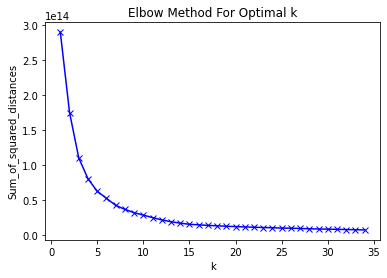

In [30]:
# the plot below shows the variations for each clusters.
# the elbow on the plot is the optimal cluster.
# elbow here is 10

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [34]:
# Plot datapoints and centroids
kmeans = KMeans(n_clusters= 10)
label = kmeans.fit_predict(S2) # predict the labels of the clusters

In [35]:
#Getting the Centroids
centers = kmeans.cluster_centers_
u_labels = np.unique(label)

In [36]:
df = S2.iloc[:,:].values

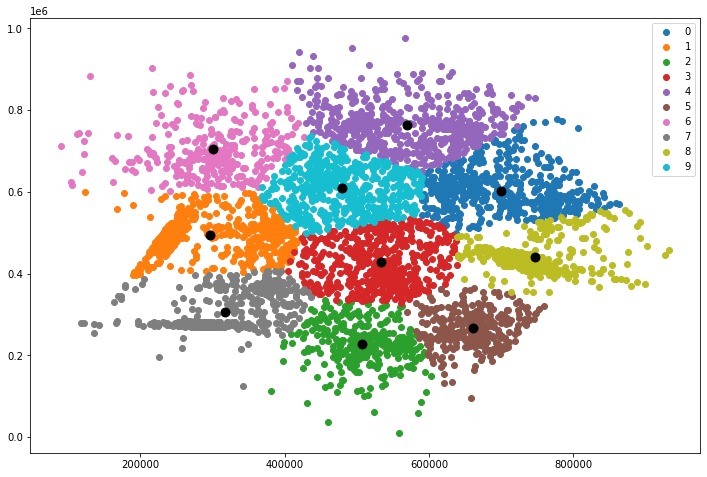

In [37]:
#plotting the results:
plt.figure(figsize=(12,8))
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centers[:,0] , centers[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [27]:
# K-means own implementation

def initialize_clusters(points, k):
    # Initializes clusters as k randomly selected points from points.
    return points[np.random.randint(points.shape[0], size=k)]
    
# Function for calculating the distance between centroids
def get_distances(centroid, points):
    # Returns the distance the centroid is from each data point in points.
    return np.linalg.norm(points - centroid, axis=1)

In [38]:
k = 10
maxiter = 150

# Initialize our centroids by picking random data points
centroids = initialize_clusters(df, k)

# Initialize the vectors in which we will store the
# assigned classes of each data point and the
# calculated distances from each centroid

classes = np.zeros(df.shape[0], dtype=np.float64)
distances = np.zeros([df.shape[0], k], dtype=np.float64)

# Loop for the maximum number of iterations
for i in range(maxiter):
    
    # Assign all points to the nearest centroid
    for i, c in enumerate(centroids):
        distances[:, i] = get_distances(c, df)
        
    # Determine class membership of each point
    # by picking the closest centroid
    classes = np.argmin(distances, axis=1)
    
    # Update centroid location using the newly
    # assigned data point classes
    for c in range(k):
        centroids[c] = np.mean(df[classes == c], 0)

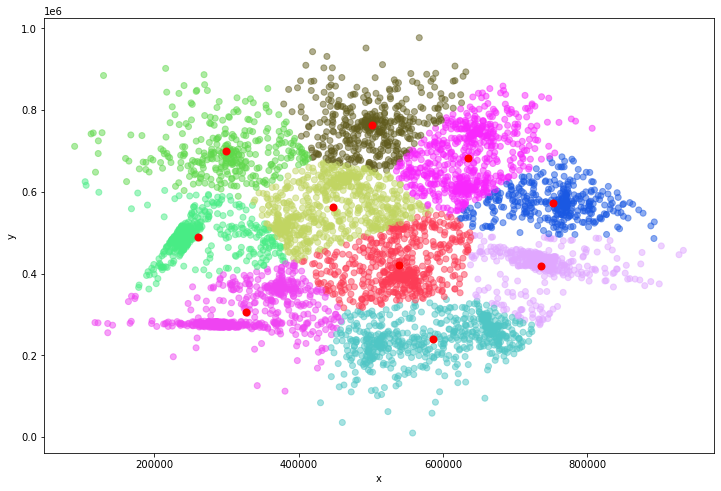

In [39]:
from random import randint

group_colors = []
n = 15
for i in range(n):
    group_colors.append('#%06X' % randint(0, 0xFFFFFF))
colors = [group_colors[j] for j in classes]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(df[:,0], df[:,1], color=colors, alpha=0.5)
ax.scatter(centroids[:,0], centroids[:,1], color='r', marker='o', lw=2)
ax.set_xlabel('x')
ax.set_ylabel('y');

Both algorithms performed good and got the similar results.